<a href="https://colab.research.google.com/github/anu-07/LGMVIP-DataScience/blob/main/Task_3_Music_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LETS GROW MORE**

Level 1:**Beginner**

Author-**Anushka Mitra**

Task 3- **Music recommendation**

Dataset- https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np 
import seaborn as sns

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
train = reduce_mem_usage(pd.read_csv('train.csv'))
#test = reduce_mem_usage(pd.read_csv('test.csv'))
ext_song = reduce_mem_usage(pd.read_csv('song_extra_info.csv'))
members = (pd.read_csv('members.csv',parse_dates=['registration_init_time','expiration_date']))
songs = reduce_mem_usage(pd.read_csv('songs.csv'))

Memory usage of dataframe is 2.14 MB
Memory usage after optimization is: 1.35 MB
Decreased by 37.0%
Memory usage of dataframe is 0.94 MB
Memory usage after optimization is: 5.07 MB
Decreased by -441.2%
Memory usage of dataframe is 2.26 MB
Memory usage after optimization is: 4.15 MB
Decreased by -83.9%


In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46827 entries, 0 to 46826
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   msno                46827 non-null  category
 1   song_id             46826 non-null  category
 2   source_system_tab   46713 non-null  category
 3   source_screen_name  45176 non-null  category
 4   source_type         46756 non-null  category
 5   target              46826 non-null  float16 
dtypes: category(5), float16(1)
memory usage: 1.4 MB


In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42270 entries, 0 to 42269
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   song_id      42270 non-null  category
 1   song_length  42270 non-null  int32   
 2   genre_ids    41503 non-null  category
 3   artist_name  42269 non-null  category
 4   composer     24545 non-null  category
 5   lyricist     11561 non-null  category
 6   language     42269 non-null  float16 
dtypes: category(5), float16(1), int32(1)
memory usage: 4.2 MB


In [ ]:
ext_song.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
ext_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40926 entries, 0 to 40925
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   song_id  40926 non-null  category
 1   name     40926 non-null  category
 2   isrc     35440 non-null  category
dtypes: category(3)
memory usage: 5.1 MB


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  object        
 1   city                    34403 non-null  int64         
 2   bd                      34403 non-null  int64         
 3   gender                  14501 non-null  object        
 4   registered_via          34403 non-null  int64         
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.8+ MB


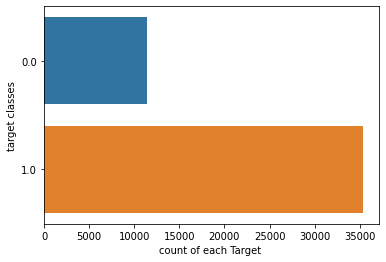

In [ ]:
sns.countplot(y=train['target'],data=train)
plt.ylabel('target classes')
plt.xlabel('count of each Target ')
plt.show()

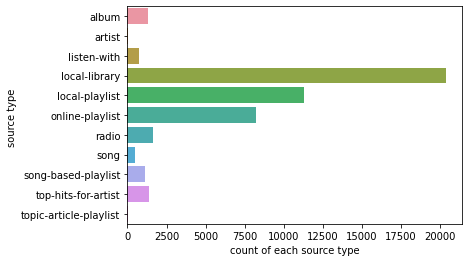

In [ ]:
sns.countplot(y=train['source_type'],data=train)
plt.ylabel('source type ')
plt.xlabel('count of each source type')
plt.show()

In [ ]:
#mising values
def miss_val(df):
    for col in df.columns:
        nan_count=df[col].isnull().sum()
        total= df.shape[0]
        pp= (nan_count/ total )* 100
        #print(type(pp))
        print(col,'has' ,pp,'% missing values')

In [ ]:
print('Training data')
miss_val(train)

Training data
msno has 0.0 % missing values
song_id has 0.002135520105921797 % missing values
source_system_tab has 0.24344929207508487 % missing values
source_screen_name has 3.525743694876887 % missing values
source_type has 0.1516219275204476 % missing values
target has 0.002135520105921797 % missing values


In [ ]:
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
gender has 57.84960613899951 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


In [ ]:
print('Song data')
miss_val(songs)

Song data
song_id has 0.0 % missing values
song_length has 0.0 % missing values
genre_ids has 1.8145256683226876 % missing values
artist_name has 0.0023657440264963333 % missing values
composer has 41.932812869647506 % missing values
lyricist has 72.64963330967589 % missing values
language has 0.0023657440264963333 % missing values


In [ ]:
print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 0.0 % missing values
isrc has 13.404681620485755 % missing values


In [ ]:
train['source_system_tab'].value_counts()

my library      32531
discover         9283
radio            1661
search           1659
listen with       840
explore           682
settings           41
notification       16
Name: source_system_tab, dtype: int64

In [ ]:
#replace with my library 
train['source_system_tab'].fillna('my library',inplace=True)

In [ ]:
train['source_type'].value_counts()

local-library             20397
local-playlist            11318
online-playlist            8218
radio                      1651
top-hits-for-artist        1400
album                      1330
song-based-playlist        1152
listen-with                 769
song                        460
artist                       49
topic-article-playlist       12
Name: source_type, dtype: int64

In [ ]:
#replace with local-library 
train['source_type'].fillna('local-library',inplace=True)

In [ ]:
train['source_screen_name'].value_counts()

Local playlist more     30767
Online playlist more     5080
Radio                    1626
Discover Feature         1291
Discover Chart           1160
Album more               1035
Artist more               823
My library                817
Others profile more       766
Search                    673
Discover Genre            436
Explore                   407
Unknown                   162
Search Trends              34
My library_Search          34
Search Home                33
Discover New               32
Name: source_screen_name, dtype: int64

In [ ]:
print('Training data')
miss_val(train)

Training data
msno has 0.0 % missing values
song_id has 0.002135520105921797 % missing values
source_system_tab has 0.0 % missing values
source_screen_name has 3.525743694876887 % missing values
source_type has 0.0 % missing values
target has 0.002135520105921797 % missing values


In [ ]:
members.drop(['gender'], axis =1, inplace=True)
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


In [ ]:
songs.drop(['composer'], axis =1, inplace=True)
songs.drop(['lyricist'], axis =1, inplace=True)

In [ ]:
songs['genre_ids'].value_counts()

465             16697
1609             2481
2022             2253
958              1760
921              1687
                ...  
289|1955            1
275|1572|359        1
242|786             1
2245|242            1
1007                1
Name: genre_ids, Length: 359, dtype: int64

In [ ]:
songs['genre_ids'].fillna('465',inplace=True)

In [ ]:
songs['language'].value_counts()

 52.0    17625
 3.0      8118
-1.0      8116
 17.0     3292
 31.0     2243
 24.0     1346
 10.0     1241
 59.0      142
 45.0      128
 38.0       18
Name: language, dtype: int64

In [ ]:
#replace with 465 
songs['language'].fillna(52.0,inplace=True)

In [ ]:
print('songs.info data')
miss_val(songs)

songs.info data
song_id has 0.0 % missing values
song_length has 0.0 % missing values
genre_ids has 0.0 % missing values
artist_name has 0.0023657440264963333 % missing values
language has 0.0 % missing values


In [ ]:
ext_song['name'].value_counts()

Silent Night              28
White Christmas           22
Intro                     21
Beautiful                 19
Jingle Bells              17
                          ..
WAIT AND I WILL WAIT       1
WAKE UP!                   1
WALK THROUGH THE NIGHT     1
WANKO                      1
 Angel Of Mine - La        1
Name: name, Length: 35997, dtype: int64

In [ ]:
#replace with Into 
ext_song['name'].fillna('Intro',inplace=True)

In [ ]:
ext_song['isrc'].value_counts()

HKD250130804    4
GBPS81500101    4
USJAY0700190    3
GBPS81500037    3
GBPS81516862    3
               ..
TWE531520406    1
TWE531520610    1
TWE531520706    1
TWE531520809    1
ADA010815612    1
Name: isrc, Length: 34664, dtype: int64

In [ ]:
#replace with Into 
ext_song['isrc'].fillna('GBPS81518952',inplace=True)

In [ ]:
print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 0.0 % missing values
isrc has 0.0 % missing values


In [ ]:
#merging data
songs_all= pd.merge(songs,ext_song,
                     on ='song_id' ,how='left')
train_memebrs= pd.merge(train,members,
                    on ='msno' ,how='left')
train_data= pd.merge(train_memebrs,songs_all,
                     on ='song_id' ,how='left')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46827 entries, 0 to 46826
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    46827 non-null  object        
 1   song_id                 46826 non-null  object        
 2   source_system_tab       46827 non-null  category      
 3   source_screen_name      45176 non-null  category      
 4   source_type             46827 non-null  category      
 5   target                  46826 non-null  float16       
 6   city                    46826 non-null  float64       
 7   bd                      46826 non-null  float64       
 8   registered_via          46826 non-null  float64       
 9   registration_init_time  46826 non-null  datetime64[ns]
 10  expiration_date         46826 non-null  datetime64[ns]
 11  song_length             7221 non-null   float64       
 12  genre_ids               7221 non-null   catego

In [ ]:
train_data.drop(['msno'], axis =1, inplace=True)
train_data.drop(['song_id'], axis =1, inplace=True)
train_data.drop(['isrc'], axis =1, inplace=True)
train_data.drop(['artist_name'], axis =1, inplace=True)
train_data.drop(['genre_ids'], axis =1, inplace=True)
train_data.drop(['name'], axis =1, inplace=True)

In [ ]:
train_data['membership_days'] = train_data['expiration_date'].subtract(train_data['registration_init_time']).dt.days.astype(int,errors='ignore')
train_data['registration_year'] = train_data['registration_init_time'].dt.year
train_data['expiration_year'] = train_data['expiration_date'].dt.year
train_data.drop(columns = ['registration_init_time' , 'expiration_date'] , inplace = True)


In [ ]:
train_data.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
0,explore,Explore,online-playlist,1.0,1.0,0.0,7.0,NaN,NaN,2103.0,2012.0,2017.0
1,my library,Local playlist more,local-playlist,1.0,13.0,24.0,9.0,NaN,NaN,2301.0,2011.0,2017.0
2,my library,Local playlist more,local-playlist,1.0,13.0,24.0,9.0,NaN,NaN,2301.0,2011.0,2017.0
3,my library,Local playlist more,local-playlist,1.0,13.0,24.0,9.0,NaN,NaN,2301.0,2011.0,2017.0
4,explore,Explore,online-playlist,1.0,1.0,0.0,7.0,NaN,NaN,2103.0,2012.0,2017.0


In [ ]:
label_encoding = ['source_system_tab', 'source_screen_name',
       'source_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for f in label_encoding:
    lb = LabelEncoder()
    lb.fit(list(train_data[f].values) )
    train_data[f] = lb.transform(list(train_data[f].values))

In [ ]:
for col in train_data.columns:
    if train_data[col].dtype == object:
        train_data[col] = train_data[col].astype('category')

In [ ]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.002135520105921797 % missing values
city has 0.002135520105921797 % missing values
bd has 0.002135520105921797 % missing values
registered_via has 0.002135520105921797 % missing values
song_length has 84.5794093151387 % missing values
language has 84.5794093151387 % missing values
membership_days has 0.002135520105921797 % missing values
registration_year has 0.002135520105921797 % missing values
expiration_year has 0.002135520105921797 % missing values


In [ ]:
train_data['song_length'].value_counts()

219324.0    201
198528.0    104
231549.0     85
222624.0     76
298945.0     72
           ... 
117551.0      1
218778.0      1
186017.0      1
251568.0      1
273402.0      1
Name: song_length, Length: 2091, dtype: int64

In [ ]:
#replace with Into 
train_data['song_length'].fillna(235415.0 ,inplace=True)

In [ ]:
train_data['language'].value_counts()

 3.0     4290
 52.0    1591
 31.0     693
-1.0      226
 17.0     168
 10.0     154
 24.0      90
 59.0       4
 45.0       4
 38.0       1
Name: language, dtype: int64

In [ ]:
train_data['language'].fillna(3.0 ,inplace=True)
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.002135520105921797 % missing values
city has 0.002135520105921797 % missing values
bd has 0.002135520105921797 % missing values
registered_via has 0.002135520105921797 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.002135520105921797 % missing values
registration_year has 0.002135520105921797 % missing values
expiration_year has 0.002135520105921797 % missing values


In [ ]:
train_data.replace([np.inf,-np.inf],np.nan, inplace =True)

In [ ]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.002135520105921797 % missing values
city has 0.002135520105921797 % missing values
bd has 0.002135520105921797 % missing values
registered_via has 0.002135520105921797 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.002135520105921797 % missing values
registration_year has 0.002135520105921797 % missing values
expiration_year has 0.002135520105921797 % missing values


In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
train_data.shape

(46827, 12)

In [ ]:
train_data = train_data.sample(frac = 1)

In [ ]:
train_data1=train_data[0:30000]

In [ ]:
train_data1.shape

(30000, 12)

In [ ]:
train_data1.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
25299,3,17,3,0.0,1.0,0.0,7.0,235415.0,3.0,567.0,2016.0,2017.0
19549,0,10,5,1.0,3.0,38.0,9.0,235415.0,3.0,3371.0,2008.0,2017.0
36574,0,2,5,1.0,13.0,34.0,9.0,269165.0,3.0,2588.0,2010.0,2017.0
46171,3,7,3,1.0,22.0,21.0,7.0,235415.0,3.0,759.0,2015.0,2017.0
17724,3,7,3,1.0,13.0,36.0,9.0,235415.0,3.0,4219.0,2006.0,2017.0


In [ ]:
x = train_data1.drop(['target'], axis =1).astype(np.float)
y = train_data1['target'].astype(np.float)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 6305 to 22418
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source_system_tab   21000 non-null  float64
 1   source_screen_name  21000 non-null  float64
 2   source_type         21000 non-null  float64
 3   city                21000 non-null  float64
 4   bd                  21000 non-null  float64
 5   registered_via      21000 non-null  float64
 6   song_length         21000 non-null  float64
 7   language            21000 non-null  float64
 8   membership_days     21000 non-null  float64
 9   registration_year   21000 non-null  float64
 10  expiration_year     21000 non-null  float64
dtypes: float64(11)
memory usage: 1.9 MB


In [ ]:
x_train.describe()

,source_system_tab,source_screen_name,source_type,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,2.542143,7.537571,3.951619,7.735857,17.621238,6.823095,236615.861048,5.148905,1679.593286,2012.612952,2017.077952
std,1.466107,3.048869,1.604093,6.502593,15.681757,2.278878,18964.752166,9.473253,1092.956797,2.940916,0.343754
min,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,17902.000000,-1.000000,3.000000,2004.000000,2016.000000
25%,3.000000,7.000000,3.000000,1.000000,0.000000,4.000000,235415.000000,3.000000,761.000000,2011.000000,2017.000000
50%,3.000000,7.000000,4.000000,5.000000,22.000000,7.000000,235415.000000,3.000000,1496.000000,2013.000000,2017.000000
75%,3.000000,7.000000,5.000000,13.000000,29.000000,9.000000,235415.000000,3.000000,2290.000000,2015.000000,2017.000000
max,7.000000,17.000000,10.000000,22.000000,131.000000,13.000000,911333.000000,52.000000,5076.000000,2016.000000,2019.000000


In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
np.isnan(x_test.any())

False

In [ ]:
clf = SVC(kernel='linear', C=1.0, random_state=0)

clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pp=clf.predict(x_test)
print ("Test - Accuracy :", accuracy_score(y_test, y_pp))
print ("Test -  Confusion matrix :\n",confusion_matrix(y_test, y_pp))

Test - Accuracy : 0.7548888888888889
Test -  Confusion matrix :
 [[   0 2206]
 [   0 6794]]
